# [Линейно разделимая выборка](https://coderun.yandex.ru/problem/linear-separability-problem/description?compiler=python)

В данном Jupyter файле будет собраны основные идеи, которые закладывались в решение задачи, полный код решения будет сохранен на Github [Вот тут (Длинная версия решения без использования сторонних библиотек)](https://github.com/neuezeldaa/Algorithms_CodeRun/blob/main/solution/221/main.py) и [Вот тут (Короткая версия с использованием sci-kit learn)](https://github.com/neuezeldaa/Algorithms_CodeRun/blob/main/solution/221/short_version.py)

## Description

Пусть имеются $n$ объектов: $X = \{ x_1, x_2, \dots , x_n\}$,
каждый из которых представлен вектором вещественных признаков: $x_i \in \mathbb{R}^m$.
Каждый объект относится к одному из двух классов, так что имеется также набор величин $\{ y_1, y_2, \dots , y_n\}$,
таких, что $y_i = +1$, если $x_i$ относится к первому классу, и $y_i = -1$, если $x_i$ относится ко второму классу.
Известно, что выборка является линейно разделимой, то есть, существует вектор $a \in \mathbb{R}^m$ такой, что:

$$
\text{sign } (\sum\limits_{j=1}^m a_j * x_ij) = y_j, 1 \leq j \leq n.
$$

Требуется по предоставленной выборке построить любой разделяющий вектор, то есть вектор, удовлетворяющий указанной выше системе уравнений.
### Input Format:

Входной файл в первой строчке содержит два числа: $n$ и $m$, $1 \le n \le 10^4$, $1 \le m \le 10$.
Каждая из следующих $n$ строчек содержит ровно $(m+1)$ число;
первые $m$ чисел каждой строчки представляют значения признаков некоторого объекта,
а последнее число строчки — соответствующий этому объекту класс.
Разделителем внутри каждой строки является пробел.

### Output Format:

Выходной файл должен содержать ровно $m$ вещественных чисел, разделённых пробелом — компоненты разделяющей гиперплоскости.


## Example Test Cases
---
### Example 1

**Input:**
```
2 1
-1 -1
1 1
```

**Output:**
```
1
```

### Example 2

**Input:**
```
3 5
1 1 1 1 1 1
1 1 1 1 1 1
1 1 1 1 1 1
```

**Output:**
```
-1 -1 -1 -1 50
```

### Example 3

**Input:**
```
5 2
9.16539 6.11173 1
6.77396 1.9927 1
8.16425 5.91999 1
5.70351 4.99134 1
9.8318 1.98502 1

```

**Output:**
```
3.14346 6.76429

```

### Example 4

**Input:**
```
5 5
1.7826 4.68275 6.10123 7.32859 7.38209 1
4.27658 4.67522 4.81731 5.19996 3.11343 1
7.91009 0.640944 6.30974 6.36116 0.81165 1
1.05574 8.23438 6.05421 7.44865 1.25079 1
1.43015 6.27736 4.77795 5.68318 0.370549 1

```

**Output:**
```
9.25372 1.03849 6.72657 2.0464 1.49246

```

---

# Решение задачи

Для начала разберем суть самой задачи. На вход подается два класса: +1 и -1.

>Наша цель: Найти такие параметры, при которых выполняются условия построения гиперплоскостей для заданных объектов. Разберем подробнее.

На вход первой строкой подаются n и m:

> n - количество объектов. Каждый объект является вектором из признаков.
> m - Количество признаков в векторе.

Даее в n строках идет m признаков в каждой и плюс один - принадлежность объекта к одному из классов (+1 или -1).

Для примера разберем **Input:**
```
2 1
-1 -1
1 1
```

Представьте, что здесь -1 - это апельсин, а +1 это яблоко. Всего задается n = 2 объектв: один объект -1 (апельсин), второй объект +1 (яблоко). У каждого из них m = 1 признак. Например, это может быть цвет (-1 это оранжевый, +1 это красный). Думаю, пример понятен.

Вывод программы должен состоять из m чисел - параметров для построения гиперплоскости для каждого признака. Придерживаясь примера, нужно найти такое число в уравнении прямой, чтоб на плоскости эта прямая разделяла красный и оранжевый цвет фруктов. Ниже будет приведен график, где можно будет оценить визуально.



В основе решения задачи используется метод линейной регрессии. В этом методе цель - решить систему нормальных уравнений:

$$
X^T * Xa = X^T * y
$$

Где X - матрица признаков, y - вектор классов (-1 и +1) и a - искомый вектор коэффициентов.

В решении будет использоваться Регуляризация Тихонова во избежании вырожденности. Описание темы регуляризации требует отдельной статьи, здесь она разбираться не будет.
Уравнение с регуляризацией будет выглядеть таким образом:

$$
(X^T + λ I) a = X^T * y
$$

λ - это достаточно малое число (10^-6)

I - Единичная матрица.

Для нахождения параметра *a* воспользуемся методом Гаусса.

In [6]:
# Реализация метода Гаусса
def gaussian_elimination(A, b):
    n = len(b)
    # Прямой ход метода Гаусса
    # Поиск строки с максимальным элементом в текущем столбце
    for col in range(n):
        # Выбор ведущего элемента
        max_row = col
        for i in range(col+1, n):
            if abs(A[i][col]) > abs(A[max_row][col]):
                max_row = i

        # Перестановка строк
        A[col], A[max_row] = A[max_row], A[col]
        b[col], b[max_row] = b[max_row], b[col]

        # Исключение переменных (прямой ход метода Гаусса)
        for i in range(col+1, n):
            factor = A[i][col] / A[col][col]
            for j in range(col, n):
                A[i][j] -= factor * A[col][j]
            b[i] -= factor * b[col]

    # Обратный ход метода Гаусса (нахождение решения)
    x = [0.0] * n
    for i in range(n-1, -1, -1):
        s = b[i]
        for j in range(i+1, n):
            s -= A[i][j] * x[j]
        x[i] = s / A[i][i]

    return x

In [ ]:
n = int(data[0])  # Количество объектов
m = int(data[1])  # Количество признаков

X = []  # Матрица признаков
y = []  # Вектор меток классов

index = 2
for i in range(n):
   features = list(map(float, data[index:index+m]))
   X.append(features)
   y.append(float(data[index+m]))
   index += m + 1

# Вычисление X^T * X
XT_X = [[0.0] * m for _ in range(m)]
for i in range(m):
   for j in range(m):
       for k in range(n):
           XT_X[i][j] += X[k][i] * X[k][j]

# Вычисление X^T * y
XT_y = [0.0] * m
for i in range(m):
    for k in range(n):
        XT_y[i] += X[k][i] * y[k]

# Добавление регуляризации (лямбда = 1e-6)
for i in range(m):
    XT_X[i][i] += 1e-6

# Решение системы уравнений
a = gaussian_elimination(XT_X, XT_y)

# Форматирование результата
result = " ".join(f"{x:.8f}" for x in a)
print(result)

На выходе мы получаем верно подобранные компоненты разделяющей гиперплоскости.

Весь код, прописанный ранее можно сократить до:

In [ ]:
from sklearn.linear_model import LinearRegression

def main():
    n, m = map(int, input().split())
    X, y = [], []
    for _ in range(n):
        row = list(map(float, input().split()))
        X.append(row[:-1])
        y.append(row[-1])

    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    print(' '.join(map(str, model.coef_)))


if __name__ == '__main__':
    main()

Но ради понимания работы линейной регрессии я решил прописать полностью ходы решения.

Разберем пример, когд на вход поступает:


```
2 1
-1 -1
1 1
```
В этом случае, как я уже говорил ранее, -1 = апельсины, +1 = яблоки. Нам их надо разделить так, чтоб не путать на столе :)




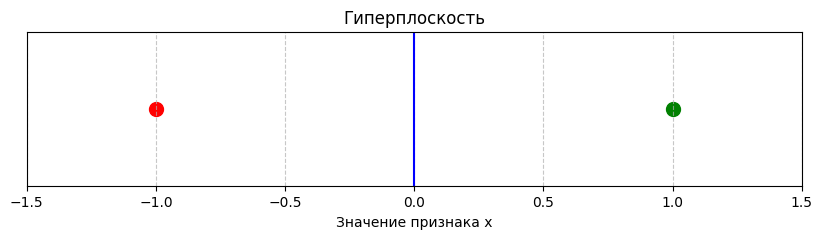

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
X = np.array([-1, 1])  # Признаки (1D)
y = np.array([-1, 1])   # Метки классов

# Находим разделяющую "гиперплоскость" (для 1D это точка)
a = 1.0  # Решение уравнения a*x=0 => x=0 (т.к. a=1)
decision_point = 0.0

# Создаем график
plt.figure(figsize=(10, 2))

# Рисуем точки данных
plt.scatter(X[y == -1], [0]*len(X[y == -1]), color='red', s=100, label='Класс -1')
plt.scatter(X[y == 1], [0]*len(X[y == 1]), color='green', s=100, label='Класс +1')

# Рисуем разделяющую точку (гиперплоскость в 1D)
plt.axvline(x=decision_point, color='blue', linestyle='-', label='Разделяющая точка x=0')

# Настройки графика
plt.yticks([])  # Скрываем ось Y (не нужна для 1D)
plt.xlabel('Значение признака x')
plt.title('Гиперплоскость')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-1.5, 1.5)
plt.show()


Из рисунка видно, что -1 - это апельсин слева, +1 - это яблоко справа. Мы их разделили так, чтоб между ними шла гиперплоскость - разделяющая прямая.

Конец!